In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine



In [26]:
engine = create_engine('postgresql://postgres:JPH401@mc@localhost:5432/PH_Employees_DB')
connection = engine.connect()


# Create a histogram to visualize the most common salary ranges for employees.

In [28]:
salaries =pd.read_sql('select * from salaries', connection)
salaries.describe()


,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


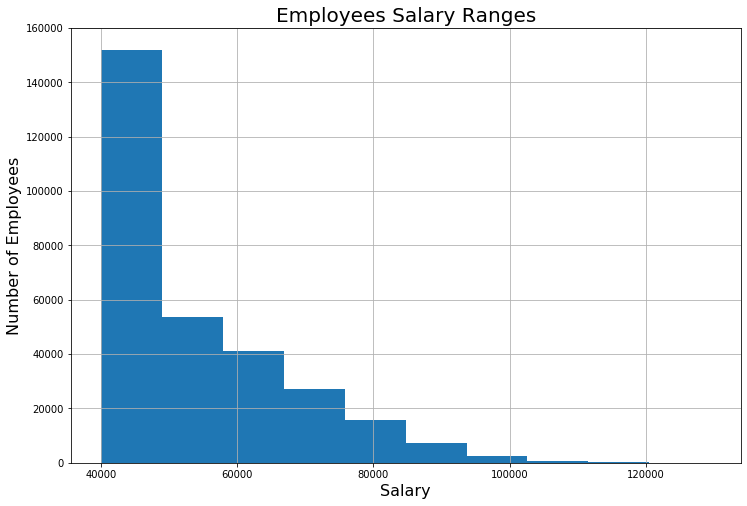

In [93]:
salaries.hist(column="salary",bins=10,figsize=[12,8])
#plt.xlim([0,13000])
plt.ylim([0,160000])
plt.title("Employees Salary Ranges",size = 20)
plt.xlabel("Salary", size = 16)
plt.ylabel("Number of Employees", size = 16)
plt.show()

# Create a bar chart of average salary by title

In [98]:
#salaries.head()
#employees.head()
emp_salary = pd.merge(employees,salaries, how='inner', on=['emp_no'])
emp_salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [108]:
titles = emp_salary['emp_title_id'].value_counts()
titles

s0001    107384
e0003     97747
e0002     47303
s0002     26583
e0004     15148
e0001      5835
m0001        24
Name: emp_title_id, dtype: int64

In [96]:
session.query(emp_salary).filter(emp_salary.emp_title_id == "s0001").filter(emp_salary.salary).mean()
session.query(emp_salary).filter(emp_salary.emp_title_id == "e0003").filter(emp_salary.salary).mean()
session.query(emp_salary).filter(emp_salary.emp_title_id == "e0002").filter(emp_salary.salary).mean()
session.query(emp_salary).filter(emp_salary.emp_title_id == "s0002").filter(emp_salary.salary).mean()
session.query(emp_salary).filter(emp_salary.emp_title_id == "e0004").filter(emp_salary.salary).mean()
session.query(emp_salary).filter(emp_salary.emp_title_id == "e0001").filter(emp_salary.salary).mean()
session.query(emp_salary).filter(emp_salary.emp_title_id == "m0001").filter(emp_salary.salary).mean()

#CREATE VIEW employee_salary AS
#SELECT e.emp_title_id, AVG(s.salary)AS "Salary"
#FROM employees e 
#JOIN salaries s 
#ON e.emp_no = s.emp_no
#GROUP BY e.emp_title_id;

#SELECT * FROM employee_salary;

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


# "Search your ID number."

In [61]:
ID =pd.read_sql('select * from employees Where emp_no = 499942', connection)
ID

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
